<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_15_2_Input_Gate_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-5. Deep Learning 기초 : Multi Layer Perceptron (MLP)

>## [예제3-15] 2 Input Logic Gate (Logistic Regression) - Multi Layer Perceptron

>### Load modules

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


> ### Input and Label

In [2]:
# Logistic regression : Logic Gate Truth Table
x_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(x_input, x_input.shape)

# labels = np.array([[0], [0], [0], [1]])  # Gate : AND
# labels = np.array([[0], [1], [1], [1]])  # Gate : OR
# labels = np.array([[1], [1], [1], [0]])  # Gate : NAND
# labels = np.array([[1], [0], [0], [0]])  # Gate : NOR
labels = np.array([[0], [1], [1], [0]])  # Gate : XOR
print(labels, labels.shape)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] (4, 2)
[[0]
 [1]
 [1]
 [0]] (4, 1)


> ### Placeholder

In [0]:
# placeholder
x_ph = tf.placeholder(tf.float32, (None, 2), name="input")          # 한 번의 input으로 두 개의 데이터가 들어올 것! / 그런데 몇 번 데이터를 투입시킬지 모르닠
labels_ph = tf.placeholder(tf.float32, (None, 1), name="labels")    # 결과값은 scalaar

>## Hypothesis

In [0]:
# Weight, Bias
# in Hidden layer
w0 = tf.Variable(tf.random_normal((2, 2), dtype=tf.float32), dtype=None, name="weight0")  # shape = (투입 변수의 개수, perceptron 개수)
b0 = tf.Variable(tf.random_normal((2,), dtype=tf.float32), dtype=None, name="bias0")      # perceptron 개수

# in Output layer : 각 layer별로 어떤 구조/그림인지 알기!
w1 = tf.Variable(tf.random_normal((2, 1), dtype=tf.float32), dtype=None, name="weight1")  # shape = (투입 변수의 개수, perceptron 개수)
b1 = tf.Variable(tf.random_normal((), dtype=tf.float32), dtype=None, name="bias1")        # perceptron 개수

# Learning Rate
learning_rate = 0.1

# Hyoithesis, Cost, Optimizer
hidden = tf.sigmoid(tf.matmul(x_ph, w0, name="mul_layer0") + b0)  # w0와 b0, 그리고 x_ph의 shape에 유의!

hypothesis = tf.sigmoid(tf.matmul(hidden, w1, name="mul_layer1") + b1)  # 결국 p.188에서 했던 활동의 순서? 구조?대로!

cost = tf.reduce_mean( -labels_ph * tf.log(hypothesis) - (1 - labels_ph) * tf.log(1 - hypothesis) ) # Cross Entropy Error

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


>### 학습 준비 과정

In [0]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

### 학습 (Training)

In [6]:
# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

check = np.array([0, 1000, 8000, 20000, 40000, N_training])
w0_trained = []
b0_trained = []
check_idx = 0

for cnt_training in range(1, N_training+1):
  _, cost_res, w0_res, b0_res = sess.run((train, cost, w0, b0), feed_dict={x_ph: x_input, labels_ph: labels})
  cost_graph[cnt_training-1] = cost_res
  if check[check_idx] == cnt_training-1:
    w0_trained.append(w0_res)
    b0_trained.append(b0_res)
    check_idx += 1
  if cnt_training % 1000 == 1:
    print("[{:>5}] cost = {:>10.4}".format(cnt_training-1, cost_graph[cnt_training-1]))

cost_res, w0_res, b0_res = sess.run((cost, w0, b0), feed_dict={x_ph: x_input, labels_ph: labels})
cost_graph[N_training] = cost_res
print("[{:>5}] cost = {:>10.4}".format(N_training, cost_graph[N_training]))
w0_trained.append(w0_res)
b0_trained.append(b0_res)

[    0] cost =     0.7225
[ 1000] cost =     0.5906
[ 2000] cost =     0.5311
[ 3000] cost =     0.5078
[ 4000] cost =     0.4957
[ 5000] cost =     0.4842
[ 6000] cost =     0.4399
[ 7000] cost =     0.2435
[ 8000] cost =     0.1202
[ 9000] cost =    0.07533
[10000] cost =     0.0541
[11000] cost =    0.04198
[12000] cost =    0.03419
[13000] cost =     0.0288
[14000] cost =    0.02485
[15000] cost =    0.02184
[16000] cost =    0.01947
[17000] cost =    0.01756
[18000] cost =    0.01598
[19000] cost =    0.01466
[20000] cost =    0.01354
[21000] cost =    0.01258
[22000] cost =    0.01174
[23000] cost =    0.01101
[24000] cost =    0.01036
[25000] cost =   0.009785
[26000] cost =   0.009269
[27000] cost =   0.008804
[28000] cost =   0.008383
[29000] cost =   0.008001
[30000] cost =   0.007651
[31000] cost =    0.00733
[32000] cost =   0.007035
[33000] cost =   0.006763
[34000] cost =   0.006511
[35000] cost =   0.006277
[36000] cost =   0.006059
[37000] cost =   0.005855
[38000] cost

>### Training Test

In [7]:
print(w0_trained)
print(b0_trained)

print()
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = sess.run(hypothesis, feed_dict={x_ph:x_input})
print(y)

y = y.reshape((-1,))
print(y)

Y = [int(y_elem>0.5) for y_elem in y]

print(x_input.shape, x_input.shape[0])
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[array([[ 1.0541964, -0.790852 ],
       [ 1.9628274, -0.8521609]], dtype=float32), array([[ 3.0508287, -0.7906428],
       [ 3.232483 , -0.8525997]], dtype=float32), array([[ 6.9650984, -3.2368183],
       [ 6.991652 , -3.2384288]], dtype=float32), array([[ 7.933558 , -5.54556  ],
       [ 7.9434643, -5.546534 ]], dtype=float32), array([[ 8.359377 , -6.2418523],
       [ 8.365627 , -6.242526 ]], dtype=float32), array([[ 8.812738 , -6.9007177],
       [ 8.816676 , -6.901159 ]], dtype=float32)]
[array([-1.0442656, -2.1475954], dtype=float32), array([-0.5615361, -2.150346 ], dtype=float32), array([-2.785516 ,  4.7299595], dtype=float32), array([-3.6155083,  8.301661 ], dtype=float32), array([-3.8531458,  9.350652 ], dtype=float32), array([-4.0934873, 10.340487 ], dtype=float32)]

[Training Test]
[[0.00213733]
 [0.9984419 ]
 [0.9984414 ]
 [0.00222725]]
[0.00213733 0.9984419  0.9984414  0.00222725]
(4, 2) 4
Input [0 0] , Target : [0] => Y : 0(y:0.0021)
Input [0 1] , Target : [1] => Y : 1(y

> ### 트레이닝 된 확인

In [8]:
w0_res, b0_res, w1_res, b1_res = sess.run((w0,b0,w1,b1))

print("w0 = ")
print(w0_res)
print("b0 = ")
print(b0_res)
print("w1 = ")
print(w1_res)
print("b1 = ")
print(b1_res)

w0 = 
[[ 8.812738  -6.9007177]
 [ 8.816676  -6.901159 ]]
b0 = 
[-4.0934873 10.340487 ]
w1 = 
[[13.365539]
 [13.516692]]
b1 = 
-19.881605


> ### Ploting : Cost/Training Count

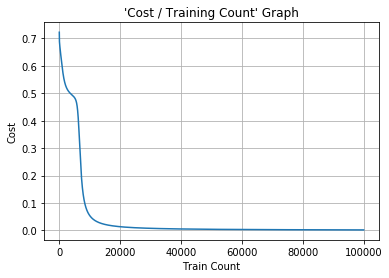

In [9]:
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)

> ### Decesion boundary

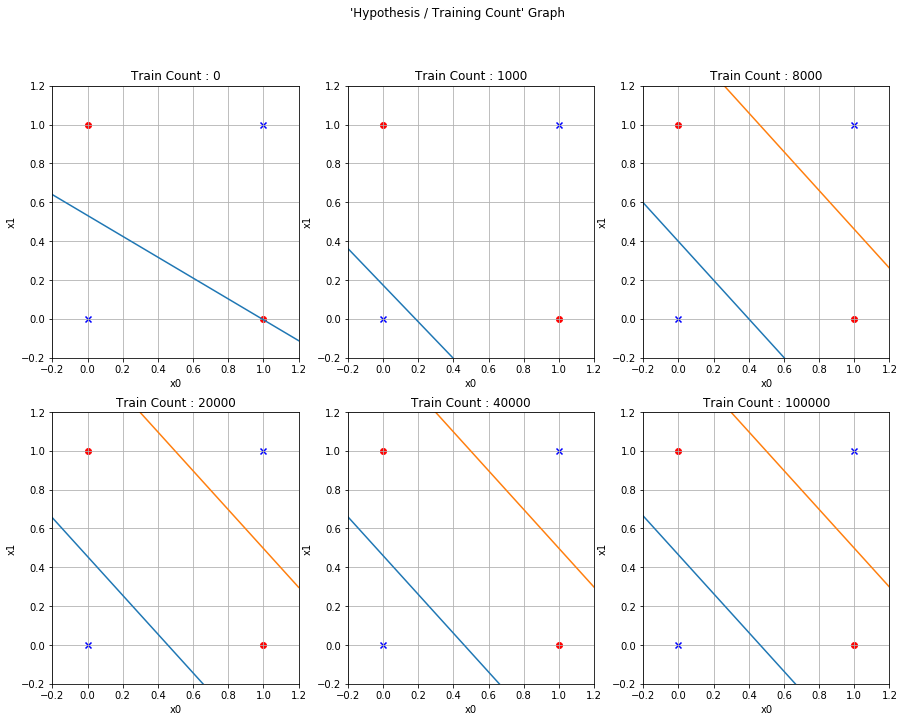

In [10]:
x_hypo = np.linspace(-0.2, 1.2, 1000)
x_col_0 = [x_input[idx][0] for idx in range(len(labels)) if labels[idx][0] == 0]
x_row_0 = [x_input[idx][1] for idx in range(len(labels)) if labels[idx][0] == 0]
x_col_1 = [x_input[idx][0] for idx in range(len(labels)) if labels[idx][0] == 1]
x_row_1 = [x_input[idx][1] for idx in range(len(labels)) if labels[idx][0] == 1]

fig_hypothesis, ax_hypothesis = plt.subplots(2, 3, figsize=(15, 11))
fig_hypothesis.suptitle("'Hypothesis / Training Count' Graph")
for ax_idx in range(check.size):
    w = w0_trained[ax_idx]
    b = b0_trained[ax_idx]
    y_hypo1 = -(w[0][0] * x_hypo + b[0])/w[1][0] 
    y_hypo2 = -(w[0][1] * x_hypo + b[1])/w[1][1] 
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col_0, x_row_0, color='blue', marker="x")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col_1, x_row_1, color='red', marker="o")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_hypo, y_hypo1, label='hypothesis1')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_hypo, y_hypo2, label='hypothesis2')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_title("Train Count : {}".format(check[ax_idx]))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlim((-0.2, 1.2))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylim((-0.2, 1.2))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].grid(True)

plt.show()